In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import os
import cv2

In [2]:
train_dir = 'train'

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
sess = tf.InteractiveSession()
train_dir = 'train/models'
latest_checkpoint = tf.train.latest_checkpoint(train_dir)
meta_path = '%s.meta' % latest_checkpoint

saver = tf.train.import_meta_graph(meta_path)
saver.restore(sess, latest_checkpoint)

x = tf.get_collection('x')[0]
keep_prob = tf.get_collection('keep_prob')[0]
y_conv = tf.get_collection('y_conv')[0]
y_target = tf.get_collection('y_target')[0]
accuracy = tf.get_collection('accuracy')[0]

feed_dict={x: mnist.test.images, y_target: mnist.test.labels, keep_prob: 1.0}

print(sess.run(accuracy, feed_dict))

INFO:tensorflow:Restoring parameters from train/models/mnist.ckpt-999
0.9679


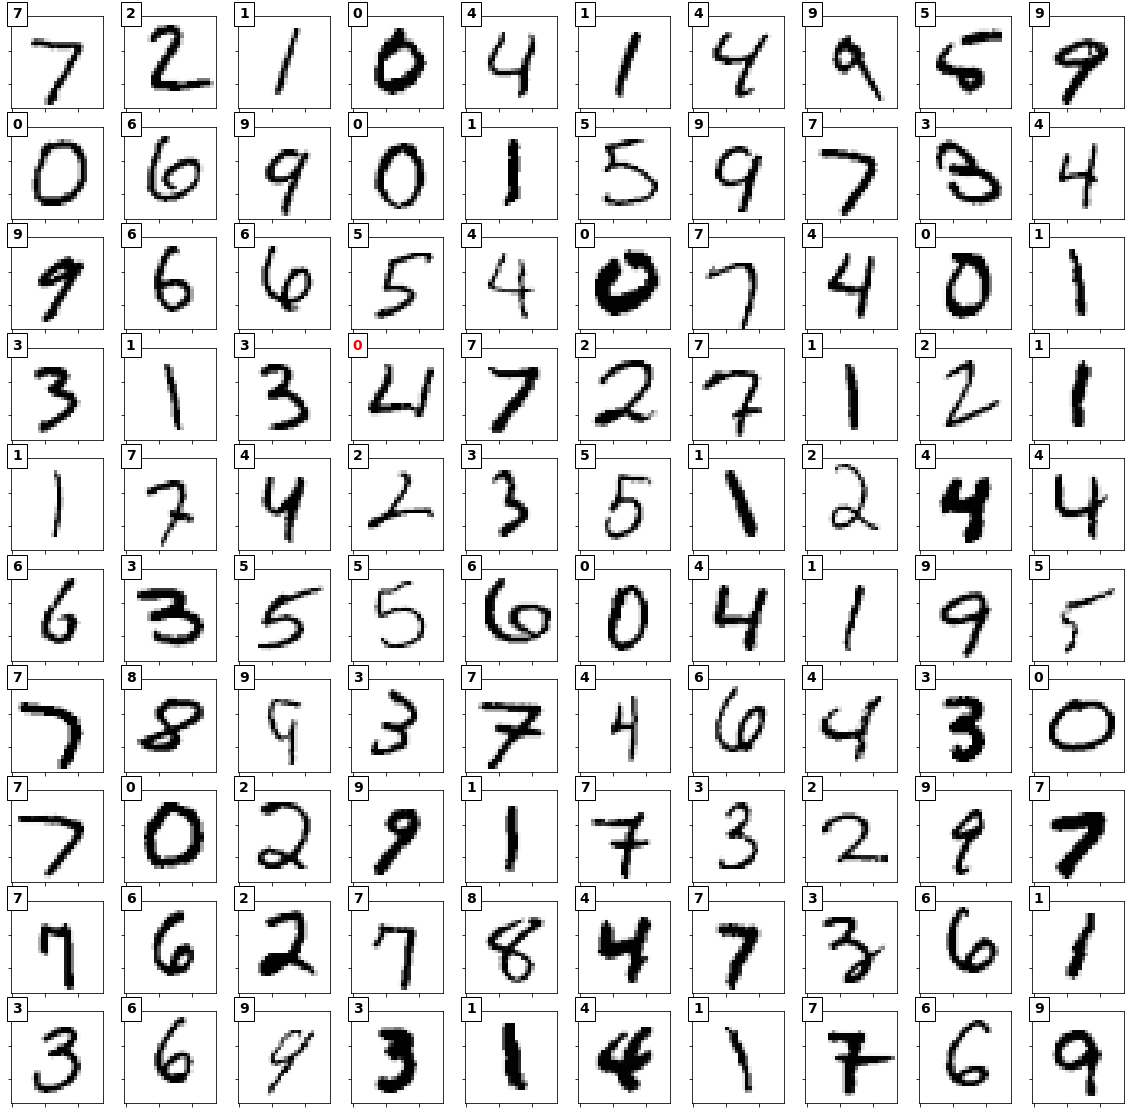

In [6]:
num_rows, num_cols = 10, 10
width, height = num_cols * 2, num_rows * 2
fig = plt.figure(figsize=(width, height))

for i in range(0, 100):
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    image = mnist.test.images[i].reshape((28, 28))
    label = mnist.test.labels[i].argmax()
    prediction = sess.run(
        y_conv, 
        feed_dict={x: mnist.test.images[i:i+1], keep_prob: 1.0}).argmax()
    ax.imshow(image, cmap='Greys', interpolation='none')
    color = 'black' if label==prediction else 'red'
    ax.text(
        0, 
        0, 
        str(prediction), 
        bbox={'facecolor':'white', 'pad':5}, 
        fontdict={'size':14, 'weight': 'bold', 'color': color}
    )